In [195]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt


In [196]:
data = pd.read_csv('data/decaydata.csv')
data.shape

(609, 18)

In [197]:
data.shape

(609, 18)

In [198]:
data.dropna(inplace=True)

In [199]:
data.shape

(407, 18)

In [200]:
# intial data
data.head()

,Code,Date,T0,T0.5,Dose Rate (mg/L),CHCl3,CHCl2Br,CHClBr2,CHBr3,TTHM,pH,COND,Turb,Cl,Br,COLOUR,FOC,UVA
0,GW1,11/02/2021,0.98,0.79,0.98,1,2,4,5,11,6.74,79.0,38.0,140.0,0.38,2.0,1.3,0.033
1,GW1,11/02/2021,1.02,1.03,1.02,1,4,9,15,28,6.74,79.0,38.0,140.0,0.38,2.0,1.3,0.033
2,GW1,11/02/2021,3.90,2.00,3.90,5,25,67,52,150,6.74,79.0,38.0,140.0,0.38,2.0,1.3,0.033
3,GW1,11/02/2021,5.80,3.50,5.80,11,37,65,27,140,6.74,79.0,38.0,140.0,0.38,2.0,1.3,0.033
4,GW1,11/02/2021,9.80,7.00,9.80,17,32,42,13,100,6.74,79.0,38.0,140.0,0.38,2.0,1.3,0.033


In [97]:
# add 30 min decay calculation
data['30 min decay'] = data["T0"]-data["T0.5"]

In [66]:
# add SUVA calculation
data["SUVA"] = data["UVA"]/data["FOC"]*100

In [98]:
data.head()

,Code,Date,T0,T0.5,Dose Rate (mg/L),CHCl3,CHCl2Br,CHClBr2,CHBr3,TTHM,pH,COND,Turb,Cl,Br,COLOUR,FOC,UVA,SUVA,30 min decay
0,GW1,11/02/2021,0.98,0.79,0.98,1,2,4,5,11,6.74,79.0,38.0,140.0,0.38,2.0,1.3,0.033,2.538462,0.19
1,GW1,11/02/2021,1.02,1.03,1.02,1,4,9,15,28,6.74,79.0,38.0,140.0,0.38,2.0,1.3,0.033,2.538462,-0.01
2,GW1,11/02/2021,3.90,2.00,3.90,5,25,67,52,150,6.74,79.0,38.0,140.0,0.38,2.0,1.3,0.033,2.538462,1.90
3,GW1,11/02/2021,5.80,3.50,5.80,11,37,65,27,140,6.74,79.0,38.0,140.0,0.38,2.0,1.3,0.033,2.538462,2.30
4,GW1,11/02/2021,9.80,7.00,9.80,17,32,42,13,100,6.74,79.0,38.0,140.0,0.38,2.0,1.3,0.033,2.538462,2.80


In [76]:
# define original X and Y
# X = data[["UVA","FOC","pH","Dose Rate (mg/L)"]]
# y = data["TTHM"].values.reshape(-1, 1)
# print(X.shape, y.shape)

(407, 4) (407, 1)


In [ ]:
# get key parameters
TTHM = data['TTHM']
Dose = data["Dose Rate (mg/L)"]
decay = data["30 min decay"]

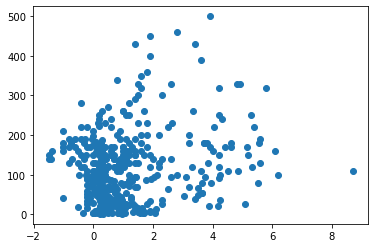

In [193]:
# plot
plt.scatter(decay,TTHM)

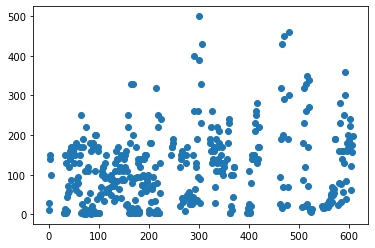

In [194]:
#plot
plt.scatter(TTHM.index,TTHM)

Training Score: 0.5046195266275988
Testing Score: 0.32650899855389526


In [73]:
#find outlier
outlier = data[(data['TTHM'] > 300) & (data['Dose Rate (mg/L)'] < 2)]

In [99]:
outlier

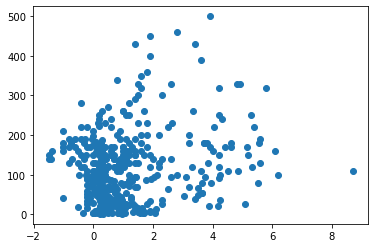

In [136]:
#remove outlier
cleaneddata = data[data["Code"] != "SW23"]

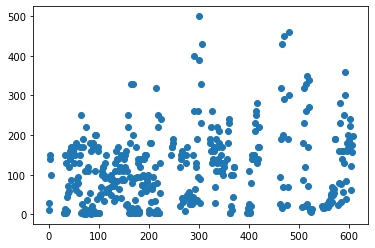

In [139]:
cleaneddata.shape

In [101]:
# create Xs and y
X = cleaneddata[["UVA","FOC","pH","Dose Rate (mg/L)","30 min decay","Br","COLOUR","Turb","Cl","COND"]]
y = cleaneddata["TTHM"].values.reshape(-1, 1)
print(X.shape, y.shape)

In [102]:
from sklearn.model_selection import train_test_split

# initial X, Y split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

,Code,Date,T0,T0.5,Dose Rate (mg/L),CHCl3,CHCl2Br,CHClBr2,CHBr3,TTHM,pH,COND,Turb,Cl,Br,COLOUR,FOC,UVA,SUVA,30 min decay
291,SW23,14/05/2021,9.6,7.7,1.0,370,25,1,1,400,7.27,8.0,4.2,14.0,0.03,13.0,5.8,0.11,1.896552,1.9


In [103]:
# initial model
model = LinearRegression()

In [104]:
# fit initial model

model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)
print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

(402, 20)

(402, 10) (402, 1)


In [184]:
# X_train, X_test, y_train, y_test = train_test_split(X, y)

In [168]:
# model = LinearRegression()

In [169]:
# model.fit(X_train, y_train)
# training_score = model.score(X_train, y_train)
# testing_score = model.score(X_test, y_test)

In [170]:
# print(f"Training Score: {training_score}")
# print(f"Testing Score: {testing_score}")

Training Score: 0.5338577521519948
Testing Score: 0.38355560377186126


Text(0.5, 1.0, 'Residual Plot')

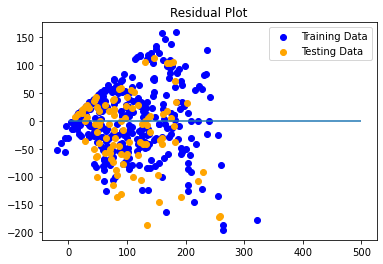

In [133]:
# residual scatter plot
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot")

array([[ 0.61196157, -0.30994793, -0.52480136, ..., -0.39423267,
        -0.4385269 , -0.08630857],
       [ 3.16321408,  0.64203499, -1.14881743, ..., -0.09666571,
        -0.31883467, -0.31291563],
       [ 2.45942028, -0.52149969, -1.7728335 , ..., -0.33755325,
        -0.46844996, -0.53952268],
       ...,
       [-0.05664254, -0.68016351, -0.52480136, ..., -0.26670397,
        -0.28891161,  0.10792605],
       [ 0.48879765,  2.01712143,  1.92669033, ..., -0.16751499,
        -0.61806526, -0.28054319],
       [ 2.81131718,  0.43048323, -1.23796258, ...,  0.79603514,
        -0.19914243, -0.28054319]])

In [185]:
# Standard scale

from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

In [164]:

# X[X.columns] = X_scaler.fit_transform(X[X.columns])

<ipython-input-164-7add320296b4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[X.columns] = X_scaler.fit_transform(X[X.columns])
C:\Users\fernb\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Users\fernb\anaconda3\lib\site-packages\pandas\core\indexing.py:692: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.

In [182]:
X_train_scaled

array([[-0.60032041, -0.7078726 , -0.80573975, ..., -0.34899453,
        -0.65843247, -0.79206364],
       [ 0.34536059,  0.94692653, -0.44387068, ..., -0.29052933,
        -0.53947912, -0.6811821 ],
       [ 3.21808968,  0.71867837, -1.1826867 , ..., -0.08590112,
        -0.33131076, -0.31685703],
       ...,
       [ 0.05987199, -0.7078726 , -1.57471152, ...,  2.04807878,
        -0.15288074, -0.23765593],
       [-0.52894826, -0.53668649,  0.27986745, ..., -0.39284343,
        -0.18261908, -0.26933637],
       [ 0.82712261,  1.51754692, -0.06692374, ..., -0.42207603,
         0.65005436,  0.42763332]])

In [ ]:
# X2_train, X2_test, y2_train, y2_test = train_test_split(X2, encoded_y, random_state=42)
# X2_train_scaled = X2_scaler.transform(X2_train)
# X2_test_scaled = X2_scaler.transform(X2_test)

In [177]:
# X_train, X_test, y_train, y_test = train_test_split(X, y)

In [186]:
# standard scaled X and Y
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

In [187]:
#scaled model
model2 = LinearRegression()

In [188]:
#git scaled model
model2.fit(X_train_scaled, y_train_scaled)
training_score2 = model2.score(X_train_scaled, y_train_scaled)
testing_score2 = model2.score(X_test_scaled, y_test_scaled)

In [189]:
print(f"Training Score: {training_score2}")
print(f"Testing Score: {testing_score2}")

Training Score: 0.5034594832523421
Testing Score: 0.5086517037542428


Text(0.5, 1.0, 'Residual Plot')

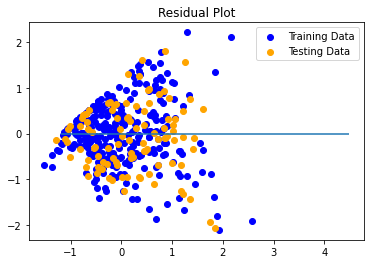

In [192]:
plt.scatter(model2.predict(X_train_scaled), model2.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(model2.predict(X_test_scaled), model2.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_train_scaled.min(), xmax=y_train_scaled.max())
plt.title("Residual Plot")

In [140]:
Ordered = TTHM.sort_values()

In [141]:
Ordered

85       1
70       1
75       2
397      3
80       3
      ... 
466    430
306    430
471    450
481    460
301    500
Name: TTHM, Length: 407, dtype: int64

In [201]:
ranges = {2:250,1:150,0:50}

In [202]:
cleaneddata["classification"] = ["H" if x >= 250 else "M" if x >= 150 else "L" for x in cleaneddata["TTHM"]]

In [203]:
cleaneddata

,Code,Date,T0,T0.5,Dose Rate (mg/L),CHCl3,CHCl2Br,CHClBr2,CHBr3,TTHM,...,COND,Turb,Cl,Br,COLOUR,FOC,UVA,SUVA,30 min decay,classification
0,GW1,11/02/2021,0.98,0.79,0.98,1,2,4,5,11,...,79.0,38.0,140.0,0.38,2.0,1.3,0.033,2.538462,0.19,0
1,GW1,11/02/2021,1.02,1.03,1.02,1,4,9,15,28,...,79.0,38.0,140.0,0.38,2.0,1.3,0.033,2.538462,-0.01,0
2,GW1,11/02/2021,3.90,2.00,3.90,5,25,67,52,150,...,79.0,38.0,140.0,0.38,2.0,1.3,0.033,2.538462,1.90,1
3,GW1,11/02/2021,5.80,3.50,5.80,11,37,65,27,140,...,79.0,38.0,140.0,0.38,2.0,1.3,0.033,2.538462,2.30,0
4,GW1,11/02/2021,9.80,7.00,9.80,17,32,42,13,100,...,79.0,38.0,140.0,0.38,2.0,1.3,0.033,2.538462,2.80,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
604,SW57,28/01/2014,0.90,0.60,0.90,1,3,13,46,62,...,40.0,0.6,80.0,0.26,2.0,2.4,0.018,0.750000,0.30,0
605,SW57,28/01/2014,2.00,1.50,2.00,3,11,42,65,121,...,40.0,0.6,80.0,0.26,2.0,2.4,0.018,0.750000,0.50,0
606,SW57,28/01/2014,3.90,3.80,3.90,11,35,67,45,158,...,40.0,0.6,80.0,0.26,2.0,2.4,0.018,0.750000,0.10,1
607,SW57,28/01/2014,5.90,5.90,5.90,13,44,67,50,174,...,40.0,0.6,80.0,0.26,2.0,2.4,0.018,0.750000,0.00,1


In [204]:
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.datasets import make_classification

In [205]:
svc = SVC(kernel="linear")

In [207]:
min_features_to_select = 1  # Minimum number of features to consider
rfecv = RFECV(estimator=model2, step=1, cv=StratifiedKFold(2),
              scoring='accuracy',
              min_features_to_select=min_features_to_select)
rfecv.fit(X_train_scaled, y_train_scaled)


ValueError: Supported target types are: ('binary', 'multiclass'). Got 'continuous' instead.